---
# 2. 나이브 베이즈
---
## 2.1. 데이터 불러오기

In [2]:
# 영화 댓글 긍정/부정 찾기 

import numpy as np 
import pandas as pd 

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
import chardet 
# encoding 자동으로 감지해 주는 library 

with open("imdb_master.csv",'rb') as f: 
    result=chardet.detect(f.read())

df = pd.read_csv("imdb_master.csv", encoding = result['encoding'])

In [4]:
# 원본을 보존하기 위해  copy 본 사용 
train = df.copy() 
train

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
...,...,...,...,...,...
99995,99995,train,"Delightfully awful! Made by David Giancola, a ...",unsup,9998_0.txt
99996,99996,train,"Watching Time Chasers, it obvious that it was ...",unsup,9999_0.txt
99997,99997,train,At the beginning we can see members of Troma t...,unsup,999_0.txt
99998,99998,train,"The movie was incredible, ever since I saw it ...",unsup,99_0.txt


## 2.2. 전처리

In [5]:
# 필요없는 열 제거 
train=train.drop(train.columns[[0,1,4]], axis=1)  #  axis=1 열기준, 가로방향
train

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
99995,"Delightfully awful! Made by David Giancola, a ...",unsup
99996,"Watching Time Chasers, it obvious that it was ...",unsup
99997,At the beginning we can see members of Troma t...,unsup
99998,"The movie was incredible, ever since I saw it ...",unsup


In [8]:
train.label, train.value_counts()

(0          neg
 1          neg
 2          neg
 3          neg
 4          neg
          ...  
 99995    unsup
 99996    unsup
 99997    unsup
 99998    unsup
 99999    unsup
 Name: label, Length: 100000, dtype: object,
 review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [9]:
# 결측치 제거
train = train[train['label'] != 'unsup'] # see only pos/neg
train['label'].value_counts() # updated df

neg    25000
pos    25000
Name: label, dtype: int64

In [10]:
train.shape, train

((50000, 2),
                                                   review label
 0      Once again Mr. Costner has dragged out a movie...   neg
 1      This is an example of why the majority of acti...   neg
 2      First of all I hate those moronic rappers, who...   neg
 3      Not even the Beatles could write songs everyon...   neg
 4      Brass pictures (movies is not a fitting word f...   neg
 ...                                                  ...   ...
 49995  Seeing as the vote average was pretty low, and...   pos
 49996  The plot had some wretched, unbelievable twist...   pos
 49997  I am amazed at how this movie(and most others ...   pos
 49998  A Christmas Together actually came before my t...   pos
 49999  Working-class romantic drama from director Mar...   pos
 
 [50000 rows x 2 columns])

In [11]:
# neg = 0, pos = 1 변환 (정수 인코딩 변환) 
train.label=[(l!='neg')*1 for l in train.label]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
train.shape, train

((50000, 2),
                                              user_review  positive
 0      Once again Mr. Costner has dragged out a movie...         0
 1      This is an example of why the majority of acti...         0
 2      First of all I hate those moronic rappers, who...         0
 3      Not even the Beatles could write songs everyon...         0
 4      Brass pictures (movies is not a fitting word f...         0
 ...                                                  ...       ...
 49995  Seeing as the vote average was pretty low, and...         1
 49996  The plot had some wretched, unbelievable twist...         1
 49997  I am amazed at how this movie(and most others ...         1
 49998  A Christmas Together actually came before my t...         1
 49999  Working-class romantic drama from director Mar...         1
 
 [50000 rows x 2 columns])

In [14]:
# 컬럼명 재 셋팅 
d=train
print(d.columns) 
d.columns = ['user_review', 'positive']
print()
print(d.columns)

Index(['review', 'label'], dtype='object')

Index(['user_review', 'positive'], dtype='object')


In [ ]:
d.shape

## 2.3.데이터셋 구분

In [14]:
# 훈련용 셋, 테스트 셋 분리 

split = 0.7 
# d_train=d[:int(split*len(d))]  # train data set
# d_test=d[int((split)*len(d)):] # test data set
d_train = d.sample(n= int(split*len(d)))
d_test = d.drop(d_train.index)

In [15]:
d_train.shape,d_train

((35000, 2),
                                              user_review  positive
 621    *** Possable spoiler but probably not ***<br /...         0
 29496  This movie is bad. If you are thinking about w...         0
 7077   Attention, possible spoilers<br /><br />This f...         0
 49193  Panahi, whose previous films such as The Circl...         1
 25326  Nothing happens.<br /><br />Then characters wi...         0
 ...                                                  ...       ...
 5246   For a good take on the Roman Empire watch the ...         0
 36773  This film limps from self indulgent moment to ...         0
 40853  Just came out of a sneak preview for this film...         1
 32001  I'm both amused and disgusted by the people wh...         0
 15586  Ms. Stowe is sensational in this power drama a...         1
 
 [35000 rows x 2 columns])

In [16]:
d_test.shape, d_test

((15000, 2),
                                              user_review  positive
 1      This is an example of why the majority of acti...         0
 2      First of all I hate those moronic rappers, who...         0
 6      This German horror film has to be one of the w...         0
 14     This film is absolutely appalling and awful. I...         0
 15     Here's a decidedly average Italian post apocal...         0
 ...                                                  ...       ...
 49989  ...this is a classic with so many great dialog...         1
 49990  The most hillarious and funny Brooks movie I e...         1
 49993  I have not read the other comments on the film...         1
 49994  Life Stinks (1991) was a step below Mel Brooks...         1
 49997  I am amazed at how this movie(and most others ...         1
 
 [15000 rows x 2 columns])

 ## 2.4. feature processing

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer() # 함수의 변수화 
features=vectorizer.fit_transform(d_train.user_review)
features

<35000x88655 sparse matrix of type '<class 'numpy.int64'>'
	with 4770899 stored elements in Compressed Sparse Row format>

In [18]:
len(vectorizer.get_feature_names()), vectorizer.get_feature_names()

(88655,
 ['00',
  '000',
  '00001',
  '00015',
  '000dm',
  '000s',
  '001',
  '003830',
  '006',
  '007',
  '0079',
  '007s',
  '0080',
  '0083',
  '009',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '01',
  '0148',
  '01pm',
  '02',
  '0230',
  '029',
  '03',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '06th',
  '07',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0ne',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '1000000',
  '10000000000000',
  '1000lb',
  '1000s',
  '1001',
  '1004',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100miles',
  '100min',
  '100mins',
  '100mph',
  '100s',
  '100th',
  '100times',
  '100x',
  '100yards',
  '100â',
  '101',
  '101st',
  '102',
  '102nd',
  '103',
  '104',
  '1040',
  '1040a',
  '1040s',
  '105',
  '105lbs',
  '106',
  '107',
  '108',
  '1080',
  '1080p',
  '109',
  '10_',
  '10am',
  '10ft',
  '10ish',
  '10k',
  '10lines',
  '10min',
  '10mins',
  '10minutes',
  '1

In [19]:
# 3만건에서 100번째 칸까지 확인하기 

i = 30000
j = 100

words=vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10, i:i+30].todense(), columns=words)

,foolhardiness,foolhardy,fooling,foolish,foolishly,foolishness,foolproof,fools,foom,foot,...,footie,footing,footlight,footlights,footling,footlockers,footloose,footman,footmats,footnote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
words

['foolhardiness',
 'foolhardy',
 'fooling',
 'foolish',
 'foolishly',
 'foolishness',
 'foolproof',
 'fools',
 'foom',
 'foot',
 'footage',
 'footages',
 'football',
 'footballer',
 'footballers',
 'foote',
 'footed',
 'footfalls',
 'foothills',
 'foothold',
 'footie',
 'footing',
 'footlight',
 'footlights',
 'footling',
 'footlockers',
 'footloose',
 'footman',
 'footmats',
 'footnote']

## 2.5. 모델링

In [21]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(features, d_train.positive)  # 학습 
# features : countervectorizer 값 (frequency 값)

MultinomialNB()

In [22]:
pred1 = model1.predict_proba(vectorizer.transform(d_test.user_review)) #예측한 features 값 출력
pred1

array([[1.00000000e+00, 6.26471143e-12],
       [1.00000000e+00, 2.21231062e-13],
       [9.59405520e-01, 4.05944797e-02],
       ...,
       [2.54513920e-03, 9.97454861e-01],
       [1.40752185e-10, 1.00000000e+00],
       [9.95336031e-02, 9.00466397e-01]])

In [23]:
model1.predict(vectorizer.transform(d_test.user_review))

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
pred1.shape

(15000, 2)

## 2.6. 평가하기

In [25]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

In [26]:
def performance(y_true, pred, color='blue', ann=True): 
    acc = accuracy_score(y_true, pred[:,1]>0.5) # 긍정일 확률 확인(0.5보다 큰지 확인)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth="3")
    xlabel("False Positive Rate")
    ylabel('True Positive Rate')
    if ann: 
        annotate("Acc: %0.2f"% acc, (0.1,0.8), size=14)
        annotate("Auc: %0.2f"% auc, (0.1,0.7), size=14)

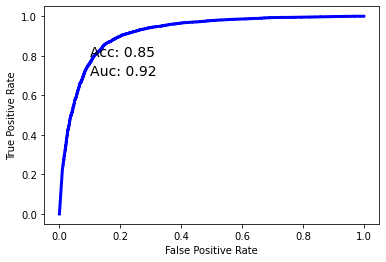

In [27]:
performance(d_test.positive, pred1)